In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)


TensorFlow 1.x selected.
1.15.2



**Dataset**

In [ ]:
!wget -r -N -c -np https://physionet.org/files/chbmit/1.0.0/




Streaming output truncated to the last 5000 lines.
Length: 54 [text/plain]
Saving to: ‘physionet.org/files/chbmit/1.0.0/chb10/chb10_30.edf.seizures’

physionet.org/files 100%[===================>]      54  --.-KB/s    in 0s      

2022-01-23 06:23:43 (14.6 MB/s) - ‘physionet.org/files/chbmit/1.0.0/chb10/chb10_30.edf.seizures’ saved [54/54]

--2022-01-23 06:23:43--  https://physionet.org/files/chbmit/1.0.0/chb10/chb10_31.edf
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 85040640 (81M) [application/octet-stream]
Saving to: ‘physionet.org/files/chbmit/1.0.0/chb10/chb10_31.edf’

physionet.org/files 100%[===================>]  81.10M  60.9MB/s    in 1.3s    

2022-01-23 06:23:44 (60.9 MB/s) - ‘physionet.org/files/chbmit/1.0.0/chb10/chb10_31.edf’ saved [85040640/85040640]

--2022-01-23 06:23:44--  https://physionet.org/files/chbmit/1.0.0/chb10/chb10_31.edf.seizures
Reusing existing connection to physionet.org:443.
HTTP request sent, 

In [ ]:
file = '/content/physionet.org/files/chbmit/1.0.0/chb03/chb03-summary.txt'
f = open(file, 'r')
file_contents = f.read()
print(file_contents)

Data Sampling Rate: 256 Hz
*************************

Channels in EDF Files:
**********************
Channel 1: FP1-F7
Channel 2: F7-T7
Channel 3: T7-P7
Channel 4: P7-O1
Channel 5: FP1-F3
Channel 6: F3-C3
Channel 7: C3-P3
Channel 8: P3-O1
Channel 9: FP2-F4
Channel 10: F4-C4
Channel 11: C4-P4
Channel 12: P4-O2
Channel 13: FP2-F8
Channel 14: F8-T8
Channel 15: T8-P8
Channel 16: P8-O2
Channel 17: FZ-CZ
Channel 18: CZ-PZ
Channel 19: P7-T7
Channel 20: T7-FT9
Channel 21: FT9-FT10
Channel 22: FT10-T8
Channel 23: T8-P8

File Name: chb03_01.edf
File Start Time: 13:23:36
File End Time: 14:23:36
Number of Seizures in File: 1
Seizure Start Time: 362 seconds
Seizure End Time: 414 seconds

File Name: chb03_02.edf
File Start Time: 14:23:39
File End Time: 15:23:39
Number of Seizures in File: 1
Seizure Start Time: 731 seconds
Seizure End Time: 796 seconds

File Name: chb03_03.edf
File Start Time: 15:23:47
File End Time: 16:23:47
Number of Seizures in File: 1
Seizure Start Time: 432 seconds
Seizure End Ti

In [ ]:
!pip install pyedflib

     |████████████████████████████████| 2.4 MB 5.4 MB/s 


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


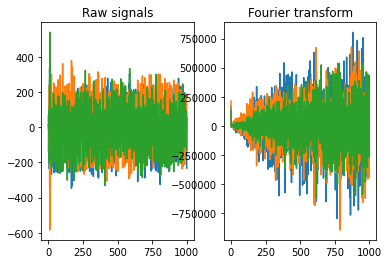

In [ ]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

# read an edf file
file2 = '/content/physionet.org/files/chbmit/1.0.0/chb02/chb02_16+.edf'
signals, signal_headers, header = highlevel.read_edf(file2)

dft = np.fft.fft(signals, axis=1)

plt.subplot(1,2,1)
plt.plot(np.transpose(signals[0:3,:1000]))
plt.title('Raw signals')
plt.subplot(1,2,2)
plt.plot(np.transpose(dft[0:3,:1000]))
plt.title('Fourier transform')
plt.show()

**Pre-Processing**

In [ ]:
import os

path = '/content/physionet.org/files/chbmit/1.0.0'

edfFiles = []
txtFiles = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if file[-4:] == '.edf':
            edfFiles.append(os.path.join(r, file))
        elif file[-4:] == '.txt':
            txtFiles.append(os.path.join(r, file))

edfFiles = sorted(edfFiles)
txtFiles = sorted(txtFiles)

for f in edfFiles:
    print(f)

for f in txtFiles:
    print(f)

/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_05.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_06.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_07.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_08.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_09.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_10.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_11.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_12.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_13.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_14.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_15.edf
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01_16.edf
/content/physionet.org/f

In [ ]:
edfFiles[-1][48:-4]

'chb24_22'

In [ ]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt

def generateLabels(edfFileName):
  sub = edfFileName[48:53]
  filePath = '/content/physionet.org/files/chbmit/1.0.0/' + sub + '/' + sub + '-summary.txt'
  f = open(filePath, 'r')
  file_contents = f.read()

  file_list = file_contents.split('\n')
  sub = edfFileName[48:-4]
  sub = 'File Name: ' + sub + '.edf'
  ind = file_list.index(sub)

  seizures = list(map(int, re.findall(r'\d+', file_list[ind+3]) ))[0]
  start = []
  end   = []
  for i in range(seizures):
    start.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+4])))[0])
    end.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+5])))[0])
    # print(start, end)

  if seizures == 0:
    labels = np.zeros((3600))
  else:
    labels = np.ones((3600))
    labels[end[-1]:] *= 0
    for i in range(len(start)):
      labels[start[i]:end[i]] *= 2

  return labels

In [ ]:
dont run this

'/content/physionet.org/files/chbmit/1.0.0/01.ed/01(50).ed-summary.txt'
/content/physionet.org/files/chbmit/1.0.0/chb01/chb01-summary.txt
/content/physionet.org/files/chbmit/1.0.0/chb24/chb24_08.edf

In [ ]:
import random

totalData       = len(edfFiles)
# random.shuffle(edfFiles)
partition       = int(len(edfFiles) * 2/3)
edfFilesVal     = edfFiles[partition:]
edfFilesTrain   = edfFiles[:partition]
trainData       = len(edfFilesTrain)
valData         = len(edfFilesVal)

print(totalData, trainData, valData)

686 457 229


In [ ]:
from keras.utils import to_categorical

def stackDFTTrain(nbatch = 2):
  count = 0

  stackedDFT = np.zeros((1, 23, 256, 3))
  stackedLabels = np.zeros((1))
  rejected   = []

  while True:
    for f in edfFilesTrain:
      # print(f[48:-4])
      if stackedDFT.shape[0] >= nbatch*3600//3 + 1:
        print(stackedLabels.shape)
        if stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape == (3600*nbatch//3, 23, 256, 3) and to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3).shape == (3600*nbatch//3, 3):
          yield (stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
                 to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        stackedDFT = stackedDFT[nbatch*3600//3:,:,:,:]
        stackedLabels = stackedLabels[nbatch*3600:]
        print('extra', stackedDFT.shape, stackedLabels.shape)

      signals, signal_headers, header = highlevel.read_edf(f)
      if signals.shape[-1] % 3600 != 0 or signals.shape[0] != 23:
        rejected.append(f[48:53])
        continue

      # if signals.shape != (23, 921600):
      #   rejected.append(f[54:59])
      #   continue

      count += 1
      print(f, signals.shape)
      s = int(signals.shape[1]/256)
      signals = np.reshape(signals, (23,256,3,s//3))
      signals = signals.transpose(3,0,1,2)
      stackedDFT = np.concatenate((stackedDFT, np.fft.fft(signals, axis=1)), axis=0)
      genLabels = generateLabels(f)
      stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)



def stackDFTVal(nbatch = 1):
  count = 0

  stackedDFT = np.zeros((1, 23, 256, 3))
  stackedLabels = np.zeros((1))
  rejected   = []

  while True:

    for f in edfFilesVal:
      # print(f[54:-4])
      if stackedDFT.shape[0] >= nbatch*3600//3 + 1:
        # stackedDFT = np.reshape(stackedDFT, (1,)+stackedDFT.shape)
        # stackedDFT = np.reshape(stackedDFT, (1,23,256,3600
        # yield (np.reshape(stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
        #                   (1,)+stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape),
        #        to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        if stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape == (3600*nbatch//3, 23, 256, 3) and to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3).shape == (3600*nbatch//3, 3):
          yield (stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
                 to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        stackedDFT = stackedDFT[nbatch*3600//3:,:,:,:]
        stackedLabels = stackedLabels[nbatch*3600:]

      signals, signal_headers, header = highlevel.read_edf(f)
      if signals.shape[-1] % 3600 != 0 or signals.shape[0] != 23:
        rejected.append(f[48:53])
        continue

      # if signals.shape != (23, 921600):
      #   rejected.append(f[54:59])
      #   continue
      count += 1
      print(f, signals.shape)
      s = int(signals.shape[1]/256)
      signals = np.reshape(signals, (23,256,3,s//3))
      signals = signals.transpose(3,0,1,2)
      stackedDFT = np.concatenate((stackedDFT, np.fft.fft(signals, axis=1)), axis=0)
      genLabels = generateLabels(f)
      stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)

Using TensorFlow backend.


In [ ]:
from keras.callbacks import Callback

# when accuracy reaches ACCURACY_THRESHOLD
ACCURACY_THRESHOLD = 0.95

class myCallback(Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('acc') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D
from keras.utils import to_categorical

nBatch = 2

in1 = Input(shape=(23, 256, 3))
c1 = Conv2D(16, (5,5), activation='relu')(in1)
# m1 = MaxPooling2D()(c1)
m1 = AveragePooling2D()(c1)
# c2 = Conv2D(128, (5,5), activation='relu')(m1)
# # m2 = MaxPooling2D()(c2)
# d1 = Dropout(0.7)(c2)
# c3 = Conv2D(256, (5,5), activation='relu')(d1)
# # m3 = MaxPooling2D()(c3)
# d2 = Dropout(0.8)(c3)
# # c4 = Conv2D(64, (3,3), activation='relu')(d2)
# # m4 = MaxPooling2D()(c4)
# fl = Flatten()(d2)
# d1 = Dense(64, activation='relu')(fl)
# d2 = Dense(16, activation='relu')(d1)
# o = Dense(921600*nBatch, activation='softmax')(m1)
fl = Flatten()(m1)
# d1 = Dense(4, activation='relu')(fl)
o = Dense(3, activation='sigmoid')(fl)

model = Model(inputs=in1, outputs=o)
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 23, 256, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 252, 16)       1216      
_________________________________________________________________
average_pooling2d_1 (Average (None, 9, 126, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18144)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 54435     
Total params: 55,651
Trainable params: 55,651
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['acc'])
# stepsTrain = int(len(edfFiles)/nBatch * 11/15)
# stepsVal = int(len(edfFiles)/nBatch * 4/15)
testSteps = int(trainData/(16*8))
valSteps = int(valData/16)
history_cnn = model.fit_generator(generator = stackDFTTrain(),
                                  steps_per_epoch = testSteps,
                                  epochs = 7,
                                  validation_data = stackDFTVal(),
                                  validation_steps = valSteps)
                                  # callbacks=[callbacks])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/7


KeyboardInterrupt: ignored